In [22]:
import datetime
import json
import random


def generate_random_clinical_data(num_records=100, seed=None):
    """
    Generate random clinical history data in JSON format.

    Args:
        num_records (int): Number of records to generate
        seed (int): Optional random seed for reproducibility

    Returns:
        list: List of dictionaries containing random clinical data
    """
    if seed is not None:
        random.seed(seed)

    records = []

    # Lists of possible values for randomization
    test_types = [
        "Blood Analysis", "Urinalysis", "Lipid Panel", "Metabolic Panel",
        "Complete Blood Count", "Liver Function", "Thyroid Panel",
        "Hormone Panel", "Vitamin D Screening", "Iron Panel",
        "Coagulation Panel", "Electrolyte Panel", "Toxicology Screening"
    ]

    doctors = [
        "Dr. Smith", "Dr. Johnson", "Dr. Williams", "Dr. Brown", "Dr. Jones",
        "Dr. Garcia", "Dr. Miller", "Dr. Davis", "Dr. Rodriguez", "Dr. Martinez",
        "Dr. Hernandez", "Dr. Lopez", "Dr. Gonzalez", "Dr. Wilson", "Dr. Anderson"
    ]

    blood_tests = {
        "hemoglobin": {"unit": "g/dL", "range": (10.0, 18.0), "reference_range": "13.5-17.5"},
        "white_blood_cells": {"unit": "cells/µL", "range": (3500, 15000), "reference_range": "4500-11000"},
        "platelets": {"unit": "platelets/µL", "range": (100000, 450000), "reference_range": "150000-450000"},
        "red_blood_cells": {"unit": "million cells/µL", "range": (3.8, 6.0), "reference_range": "4.5-5.9"},
        "hematocrit": {"unit": "%", "range": (35.0, 50.0), "reference_range": "38.3-48.6"},
        "mean_corpuscular_volume": {"unit": "fL", "range": (75.0, 100.0), "reference_range": "80-100"},
        "mean_corpuscular_hemoglobin": {"unit": "pg", "range": (25.0, 35.0), "reference_range": "27-33"}
    }

    chemistry_tests = {
        "glucose": {"unit": "mg/dL", "range": (70, 140), "reference_range": "70-99"},
        "creatinine": {"unit": "mg/dL", "range": (0.6, 1.5), "reference_range": "0.7-1.3"},
        "bun": {"unit": "mg/dL", "range": (7, 25), "reference_range": "8-20"},
        "sodium": {"unit": "mmol/L", "range": (130, 150), "reference_range": "135-145"},
        "potassium": {"unit": "mmol/L", "range": (3.0, 5.5), "reference_range": "3.5-5.0"},
        "chloride": {"unit": "mmol/L", "range": (95, 110), "reference_range": "96-106"},
        "calcium": {"unit": "mg/dL", "range": (8.0, 11.0), "reference_range": "8.5-10.5"}
    }

    lipid_tests = {
        "total_cholesterol": {"unit": "mg/dL", "range": (120, 300), "reference_range": "<200"},
        "triglycerides": {"unit": "mg/dL", "range": (50, 300), "reference_range": "<150"},
        "hdl_cholesterol": {"unit": "mg/dL", "range": (30, 90), "reference_range": ">40"},
        "ldl_cholesterol": {"unit": "mg/dL", "range": (70, 200), "reference_range": "<100"}
    }

    urine_tests = {
        "specific_gravity": {"unit": "", "range": (1.005, 1.030), "reference_range": "1.005-1.030"},
        "ph": {"unit": "", "range": (4.5, 8.0), "reference_range": "4.5-8.0"},
        "glucose": {"unit": "mg/dL", "range": (0, 15), "reference_range": "Negative"},
        "protein": {"unit": "mg/dL", "range": (0, 20), "reference_range": "Negative"},
        "ketones": {"unit": "mg/dL", "range": (0, 10), "reference_range": "Negative"},
        "blood": {"unit": "cells/hpf", "range": (0, 5), "reference_range": "Negative"}
    }

    all_test_categories = [blood_tests, chemistry_tests, lipid_tests, urine_tests]

    conclusion_normal = [
        "All values within normal range.",
        "Results indicate normal function.",
        "No significant abnormalities detected.",
        "Values are within expected parameters.",
        "Test results show normal health indicators."
    ]

    conclusion_abnormal = [
        "Some values outside reference range, follow-up recommended.",
        "Results indicate potential issues requiring further investigation.",
        "Minor abnormalities detected, monitoring advised.",
        "Several values outside normal parameters, consultation recommended.",
        "Test results suggest need for additional testing."
    ]

    for _ in range(num_records):
        patient_uuid = "pat_789012"  # Fixed as requested

        days_ago = random.randint(1, 730)
        test_date = (datetime.datetime.now() - datetime.timedelta(days=days_ago)).strftime("%Y-%m-%dT%H:%M:%SZ")

        test_type = random.choice(test_types)

        num_categories = random.randint(1, 3)
        selected_categories = random.sample(all_test_categories, num_categories)

        results = {}
        abnormal_found = False

        for category in selected_categories:
            num_tests = random.randint(1, min(5, len(category)))
            selected_tests = random.sample(list(category.keys()), num_tests)

            for test in selected_tests:
                test_info = category[test]
                value = round(random.uniform(*test_info["range"]), 1)

                if random.random() < 0.2:  # 20% chance of abnormal value
                    if random.random() < 0.5:
                        value = round(test_info["range"][0] * 0.8, 1)  # Below range
                    else:
                        value = round(test_info["range"][1] * 1.2, 1)  # Above range
                    abnormal_found = True

                results[test] = {
                    "value": value,
                    "unit": test_info["unit"],
                    "reference_range": test_info["reference_range"]
                }

        if abnormal_found:
            conclusion = random.choice(conclusion_abnormal)
        else:
            conclusion = random.choice(conclusion_normal)

        record = {
            "patient_uuid": patient_uuid,
            "test_info": {
                "test_type": test_type,
                "test_date": test_date,
                "collected_by": random.choice(doctors)
            },
            "results": results,
            "conclusions": conclusion
        }

        if random.random() < 0.3:
            record["test_info"]["location"] = random.choice([
                "Main Hospital", "North Clinic", "South Wing Lab",
                "East Medical Center", "West Health Pavilion"
            ])

        if random.random() < 0.3:
            record["test_info"]["order_number"] = f"ORD-{random.randint(10000, 99999)}"

        if random.random() < 0.4:
            record["notes"] = random.choice([
                "Patient fasting for 12 hours prior to test.",
                "Patient reported feeling well at time of collection.",
                "Follow-up recommended in 6 months.",
                "Compared with previous results from last visit.",
                "Patient on medication that may affect results."
            ])

        records.append(record)

    return records

In [23]:
processing_batch = generate_random_clinical_data(num_records=1)

print(json.dumps(processing_batch, indent=2))

[
  {
    "patient_uuid": "pat_789012",
    "test_info": {
      "test_type": "Electrolyte Panel",
      "test_date": "2024-06-12T22:32:45Z",
      "collected_by": "Dr. Johnson",
      "order_number": "ORD-97405"
    },
    "results": {
      "triglycerides": {
        "value": 147.5,
        "unit": "mg/dL",
        "reference_range": "<150"
      },
      "ldl_cholesterol": {
        "value": 144.1,
        "unit": "mg/dL",
        "reference_range": "<100"
      },
      "hdl_cholesterol": {
        "value": 108.0,
        "unit": "mg/dL",
        "reference_range": ">40"
      },
      "mean_corpuscular_hemoglobin": {
        "value": 20.0,
        "unit": "pg",
        "reference_range": "27-33"
      }
    },
    "conclusions": "Several values outside normal parameters, consultation recommended.",
    "notes": "Patient on medication that may affect results."
  }
]


# Initial test to determine cluster accessibility and correct processing

In [32]:
import subprocess
import requests

#ENDPOINT_URL = subprocess.check_output(["minikube", "service", "msvc-integrator-service", "--url"]).decode("utf-8").strip()

ENDPOINT_URL = 'http://34.160.104.82'

LAB_ID = 'hands_on_hacking'
LAB_TOKEN = 'hickey_&_arcuri'

response__ = requests.post(f'{ENDPOINT_URL}/api/lab-results', data=json.dumps({
    'documents_batch': processing_batch
}), headers={
    'Content-Type': 'application/json',
    'lab_id': LAB_ID,
    'lab_token': LAB_TOKEN,
},
verify=False)

In [33]:
print(f'method: {response__.request.method}, response url: {response__.url}\n')
print(f'request headers: {response__.request.headers}\n')
print(f'response headers: {response__.headers}\n')
print(f'response content: {response__.content}\n')
print(f'total elapsed seconds: {response__.elapsed.total_seconds()}\n')

method: POST, response url: http://34.160.104.82/api/lab-results

request headers: {'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Type': 'application/json', 'lab_id': 'hands_on_hacking', 'lab_token': 'hickey_&_arcuri', 'Content-Length': '687'}

response headers: {'Server': 'gunicorn', 'Date': 'Tue, 11 Mar 2025 03:37:04 GMT', 'Content-Type': 'application/json', 'Content-Length': '137', 'X-Trace-Id': '0409d035-fa16-4927-aaac-22d95566328f', 'Via': '1.1 google'}

response content: b'{"details":"message_id::f512a3a0-197b-4eaa-a096-d6a3d8e82424","message":"lab results batch sent to processing queue","status":"success"}\n'

total elapsed seconds: 0.138414



# Single Batch Testing - 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1_000 Documents

In [34]:
def perform_request(num_records, sleep_time=30):
    processing_batch__ = generate_random_clinical_data(num_records=num_records)

    res = requests.post(
        f'{ENDPOINT_URL}/api/lab-results',
        data=json.dumps({'documents_batch': processing_batch__}),
        headers={
            'Content-Type': 'application/json',
            'lab_id': LAB_ID,
            'lab_token': LAB_TOKEN,
        }
    )

    time.sleep(sleep_time)

    return res

In [35]:
import time

response_times: list = []

x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 1_000]
for records, i in zip(x, range(len(x))):
    response = perform_request(num_records=records, sleep_time=i * 3)

    response_times.append(response.elapsed.total_seconds())

print(f'response times: {response_times}')
print(f'avg response times: {sum(response_times) / len(response_times)}')

response times: [0.165263, 0.149856, 0.141632, 0.148494, 0.151043, 0.161463, 0.154987, 0.160374, 0.164487, 0.151518, 0.16437, 0.213433, 0.214474, 0.323897, 0.430453]
avg response times: 0.19304960000000002


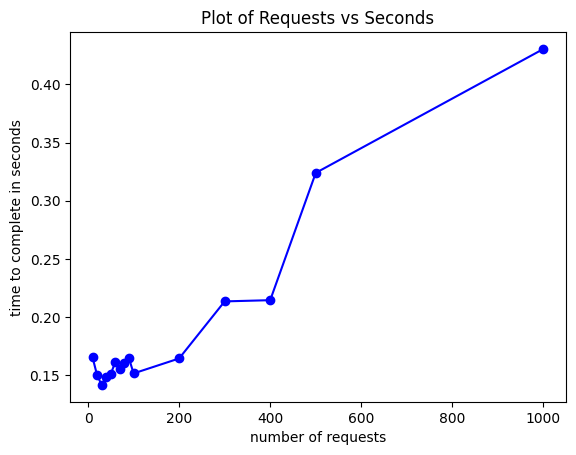

In [36]:
import matplotlib.pyplot as plt

plt.plot(x, response_times, marker='o', linestyle='-', color='b')

plt.xlabel('number of requests')
plt.ylabel('time to complete in seconds')
plt.title('Plot of Requests vs Seconds')

plt.show()